In [1]:
# I start out by importing pandas and numpy, and the dataset to examine the dataset in detail
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r'C:\Users\kingd\Documents\mydata\ground_vehicles.xlsx', sheet_name='ground_vehicles_full')

In [3]:
df.head()

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,Vendor Name,Vendor Top Name,PSC Name
0,261901205,NaN,SPE4A616M0117,NaN,2016,"BEARING,PLAIN,SPHER",NaN,DLA Aviation (formerly Defense Supply Center R...,US Department of Defense (DoD),NaN,NaN,Longhorn Regional Service Center LLC,Longhorn Regional Service Center LLC,(31) BEARINGS
1,261915422,NaN,VA26014P1360,P00003,2016,PREVENTATIVE MAINTENANCE SERVICES ON NEPTUNE U...,25990.00,VISN 20: Northwest Network,US Department of Veterans Affairs (VA),OR,Portland,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
2,261916094,NaN,VA25912C0281,P00004,2016,IGF::CT::IGF STRYKER SERVICE PLAN FOR VA FORT ...,13053.38,VISN 19: Rocky Mountain Network,US Department of Veterans Affairs (VA),MI,Portage,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
3,261919276,NaN,VA25115C0125,P00001,2016,IGF::OT::IGF MAINTENANCE OF PATIENT BEDS OPTIO...,16356.00,VA Ann Arbor Healthcare System,US Department of Veterans Affairs (VA),MI,Ann Arbor,"Imaging Diagnostics, Inc.","Imaging Diagnostics, Inc.",(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
4,261919325,NaN,VA25114C0139,P00001,2016,IGF::OT::IGF MAINTENANCE OF STRYKER NAV II SYSTEM,68023.62,VA Ann Arbor Healthcare System,US Department of Veterans Affairs (VA),MI,Ann Arbor,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...


In [4]:
df.shape[0]

54379

In [5]:
df.columns

Index(['ID', 'Contract Number (IDVPIID)', 'Award Number (PIID)',
       'Modification Number', 'Fiscal Year', 'Title', 'Awarded Amount',
       'Contracting Office', 'Contracting Agency',
       'Place of Performance State', 'Place of Performance City',
       'Vendor  Name', 'Vendor  Top Name', 'PSC Name'],
      dtype='object')

In [6]:
# Now we have our imported dataset of 54379 rows, before we move into analysis we need to clean up and standarize a few things. It appears certain columns have odd spacing, I will standardize them below to make it easier later on. Furthermore some coporations have inaccurate spelling or capitalization, which I will also fix.
df = df.rename(columns={'Vendor  Name': 'vendor_name'})
df = df.rename(columns={'Vendor  Top Name': 'vendor_top'})
df = df.rename(columns={'Vendor  Top Name': 'vendor_top'})
df.loc[df['vendor_top'].str.contains('General Dynamics Corp'), 'vendor_top'] = 'General Dynamics Corporation'
df['vendor_top'] = df['vendor_top'].replace('L3harris Technologies, Inc.', 'L3Harris Technologies')
df['vendor_top'] = df['vendor_top'].replace('BAE SYSTEMS PLC', 'BAE Systems')

In [7]:
# Now that we can get started lets look back onto the requirements for the report. The requirements for the report indicate only a interest in Ground Combat Systems (GCS) for the department of defence (DoD) for fiscal years from 2016 to 2020
df['Contracting Agency'].value_counts()

US Department of Defense (DoD)                      39422
US Department of Veterans Affairs (VA)              13337
US Department of Health and Human Services (HHS)      342
Department of Veterans Affairs                        190
US Department of Justice (DOJ)                        155
                                                    ...  
State of Oklahoma                                       1
State of Hawaii                                         1
City of Mobile                                          1
Village of Los Lunas                                    1
Ocean County                                            1
Name: Contracting Agency, Length: 80, dtype: int64

In [8]:
# Despite having 54379 rows worth of data, it is clear from the value.counts that atleast a majority of the rows are not related to our clients interest. We need to funnel our data down to only the relevent parts, starting with DoD, and the fiscal years from 2016 to 2020.
df1 = df[df['Contracting Agency'] == 'US Department of Defense (DoD)']

In [9]:
display(df1)
df1.shape[0]

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
0,261901205,NaN,SPE4A616M0117,NaN,2016,"BEARING,PLAIN,SPHER",NaN,DLA Aviation (formerly Defense Supply Center R...,US Department of Defense (DoD),NaN,NaN,Longhorn Regional Service Center LLC,Longhorn Regional Service Center LLC,(31) BEARINGS
22,262000126,NaN,SPE4A616F0002,NaN,2016,"MODIFICATION KIT,CO",NaN,DLA Aviation (formerly Defense Supply Center R...,US Department of Defense (DoD),NaN,NaN,"L3harris Technologies, Inc.",L3Harris Technologies,"(58) COMMUNICATION, DETECTION, AND COHERENT RA..."
23,262000315,NaN,SPE2DS16M0038,NaN,2016,"FIXATION SET,EXTERNAL,ORTHOPEDIC",NaN,DLA Troop Support - Medical,US Department of Defense (DoD),NaN,NaN,Howmedica Osteonics Corp.,Stryker Corporation,"(65) MEDICAL, DENTAL, AND VETERINARY EQUIPMENT..."
39,262035006,NaN,W56HZV16D0014,NaN,2016,"VEHICULAR BRAKE, STEERING, AXLE, WHEEL, AND TR...",NaN,ACC Warren Contracting Center (ACC-WRN),US Department of Defense (DoD),NaN,NaN,Seco Parts & Equipment Company,SECO PARTS & EQUIPMENT COMPANY,(25) VEHICULAR EQUIPMENT COMPONENTS
190,265007265,NaN,SPE2DS16M0237,NaN,2016,"FIXATION SET,EXTERNAL,ORTHOPEDIC",NaN,DLA Troop Support - Medical,US Department of Defense (DoD),NaN,NaN,Howmedica Osteonics Corp.,Stryker Corporation,"(65) MEDICAL, DENTAL, AND VETERINARY EQUIPMENT..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54372,676404108,NaN,FA489017C0005,P00045,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,-95259.90,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54373,676404109,NaN,FA489017C0005,P00045,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,0.00,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54374,676404110,NaN,FA489017C0005,P00046,2021,PROGRAM MANAGEMENT SUPPORT- ALL ACTIVITIES REQ...,0.00,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54375,676404111,NaN,FA489017C0005,P00046,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,2563626.87,US Department of the Air Force,US Department of Defense (DoD),SC,Shaw AFB,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS


39422

In [10]:
# Now that we only have the DoD inputs, lets drop values outside our years, as we can see there are some inputs in fiscal year 2021. 
dod_df = df1[(df1['Fiscal Year'] >= 2016) & (df1['Fiscal Year'] <= 2020)]

In [11]:
dod_df['PSC Name'].value_counts()

(6640) LABORATORY EQUIPMENT AND SUPPLIES                                   21350
(6515) MEDICAL AND SURGICAL INSTRUMENTS, EQUIPMENT, AND SUPPLIES            1691
(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES, TRACKED                       913
(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL                          805
(6525) IMAGING EQUIPMENT AND SUPPLIES: MEDICAL, DENTAL, VETERINARY           722
                                                                           ...  
(1560) AIRFRAME STRUCTURAL COMPONENTS                                          1
(Y1EE) CONSTRUCTION OF TANK AUTOMOTIVE FACILITIES                              1
(14) GUIDED MISSILES                                                           1
(2940) ENGINE AIR AND OIL FILTERS, STRAINERS, AND CLEANERS, NONAIRCRAFT        1
(J012) MAINT/REPAIR/REBUILD OF EQUIPMENT- FIRE CONTROL EQUIPMENT               1
Name: PSC Name, Length: 416, dtype: int64

In [12]:
# It seems that the PSC column might not help us getting only the GCS Vehicles, lets see if by searching for their string we can find the rows we need to access. it is crucial to not only see the acquirement but also maintence and care of these GCS vehicles.
gcs_df = dod_df[dod_df['Title'].str.contains('M1A1|M2A1|M1130|Bradley|BRADLEY', na=False)]
Abrams_df = dod_df[dod_df['Title'].str.contains('M1A1', na=False)]
Bradley_df = dod_df[dod_df['Title'].str.contains('M2A1|Bradley|BRADLEY', na=False)]
M1130_df = dod_df[dod_df['Title'].str.contains('M1130', na=False)]

In [13]:
# Now that we have the relevant data points, we can move on with our analysis. 
gcs_df['PSC Name'].value_counts()

(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES, TRACKED                                      159
(J069) MAINT/REPAIR/REBUILD OF EQUIPMENT- TRAINING AIDS AND DEVICES                          58
(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECHNICAL                                          50
(6910) TRAINING AIDS                                                                         23
(2520) VEHICULAR POWER TRANSMISSION COMPONENTS                                               12
(1290) MISCELLANEOUS FIRE CONTROL EQUIPMENT                                                   8
(V119) TRANSPORTATION/TRAVEL/RELOCATION- TRANSPORTATION: OTHER                                8
(Z1EE) MAINTENANCE OF TANK AUTOMOTIVE FACILITIES                                              8
(5420) BRIDGES, FIXED AND FLOATING                                                            8
(2530) VEHICULAR BRAKE, STEERING, AXLE, WHEEL, AND TRACK COMPONENTS                           8
(J010) MAINT/REPAIR/REBUILD OF EQUIPMENT

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Award Amount by Year For Specified GCS projects')

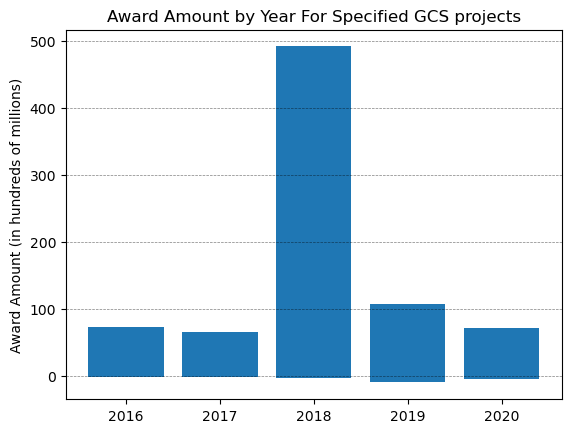

In [29]:
plt.bar(gcs_df['Fiscal Year'], gcs_df['Awarded Amount'])
plt.ticklabel_format(style='plain') 
plt.yticks([0, 100000000, 200000000, 300000000, 400000000, 500000000], ['0', '100', '200', '300','400','500'])
plt.ylabel('Award Amount (in hundreds of millions)')
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Award Amount by Year For Specified GCS projects')

In [16]:
# Initial investigation suggests a great deal of money thrown around in 2018, was this because of the acquirement of new vehicles or great maintance cost? lets dig in deeper.
top_year = gcs_df[gcs_df['Fiscal Year'] == 2018]

In [17]:
top_year.nlargest(10,'Awarded Amount')

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
30954,545669179,W56HZV18D0012,3,0,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",4.920155e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
28622,544002505,W56HZV18D0012,4,0,2018,"UNDER THE PROPOSED CLASS OF CONTRACTS, THE ARM...",4.416123e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
30960,545677007,W56HZV18D0012,2,0,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",2.793410e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
30937,545656509,W56HZV18D0012,1,0,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",2.042888e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
29526,544527714,NaN,W56HZV18C0133,0,2018,A4 UCA FOR PRODUCTION OF 164 BRADLEY M2A4 AND ...,1.322383e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
32552,553404847,NaN,W56HZV15C0119,P00058,2018,THOR II HYDRO MECHANICALLY PROPELLED TRANSMISS...,4.300890e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Muskegon,"L3 Technologies, Inc.",L3Harris Technologies,(2520) VEHICULAR POWER TRANSMISSION COMPONENTS
28330,543795654,NaN,W56HZV15C0099,P00067,2018,STS BRADLEY MODIFICATION P00067,1.368781e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
23965,322821805,HC102817D0002,HC102818F0082,0,2018,BRADLEY ABRAMS INSTALLATION KITS,1.004654e+07,DITCO-Scott: IT Contracting (PL83),US Department of Defense (DoD),MD,Aberdeen Proving Ground,"Ace Electronics Defense Systems, LLC","Ace Electronics Defense Systems, LLC",(5895) MISCELLANEOUS COMMUNICATION EQUIPMENT
24250,323836505,NaN,W56HZV17C0026,P00002,2018,IGF::OT::IGF CONTRACTOR LOGISTIC SUPPORT FOR I...,8.333644e+06,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),NaN,NaN,General Dynamics Land Systems Inc.,General Dynamics Corporation,(J010) MAINT/REPAIR/REBUILD OF EQUIPMENT- WEAPONS
30931,545651500,NaN,W900KK18C0016,0,2018,THE ABRAMS ED/TT CONTRACT IS FOR THE UPGRADE O...,7.487966e+06,"ACC-APG Orlando, FL",US Department of Defense (DoD),FL,Tampa,Cae USA Inc.,CAE Inc,(6910) TRAINING AIDS


Text(0, 0.5, 'Award Amount (in hundreds of millions)')

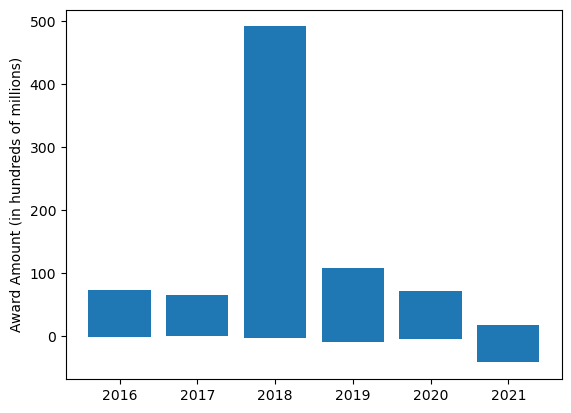

In [18]:
# Interesting, the largest expenses seem to be for contracting for three year contracts. Considering 2018 is a peak year for spending according to the previous bar graph it is worth asking if these contracts are repeated? and if such, it is likely that such those that fall under these three year contracts would likely reappear in 2021. Since our dataset orginally did feature 2021 data, lets see if there was a upswing.
gcs_df_full = df1[df1['Title'].str.contains('M1A1|M2A1|M1130|Bradley|BRADLEY', na=False)]
plt.bar(gcs_df_full['Fiscal Year'], gcs_df_full['Awarded Amount'])
plt.ticklabel_format(style='plain') 
plt.yticks([0, 100000000, 200000000, 300000000, 400000000, 500000000], ['0', '100', '200', '300','400','500'])
plt.ylabel('Award Amount (in hundreds of millions)')

In [19]:
low_year = gcs_df_full[gcs_df_full['Fiscal Year'] == 2021]
display(low_year.nlargest(3,'Awarded Amount'))
display(low_year.nsmallest(3,'Awarded Amount'))

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
54287,676267887,W56HZV18D0024,W56HZV21F0248,0,2021,DELIVERY ORDER W56HZV-21-F-0248 TO CONTRACT W5...,16397190.0,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),IN,Columbus,Cummins Inc.,Cummins Inc.,(2815) DIESEL ENGINES AND COMPONENTS
50322,656324739,NaN,W56HZV15C0099,P00163,2021,SYSTEMS TECHNICAL SUPPORT AND SUSTAINMENT SYST...,7487502.0,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
52025,671282954,NaN,W56HZV15C0099,P00169,2021,SYSTEMS TECHNICAL SUPPORT AND SUSTAINMENT SYST...,7301116.0,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...


,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
52672,672461224,NaN,W56HZV18C0133,P00060,2021,TERMINATION FOR CONVENIENCE OF 32 VEHICLES FRO...,-42485868.55,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
52040,671282979,NaN,W56HZV18C0133,P00059,2021,ATTACHMENT 0018 DEFINITIZATION. THE CONTRACTOR...,-1604665.51,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
54250,676267723,NaN,W56HZV15C0099,P00182,2021,SYSTEMS TECHNICAL SUPPORT AND SUSTAINMENT SYST...,-843205.59,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...


Text(0, 0.5, 'Award Amount (in hundreds of millions)')

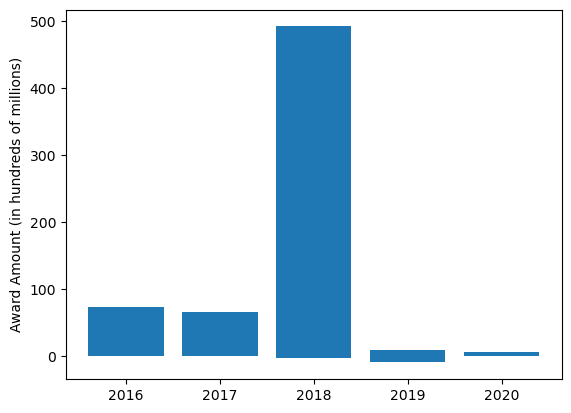

In [20]:
# With this, we don't see any awards amounts of a similar scale in 2021 related to GCS. It could be too early in the year and as a result we do not have any repeat contracts. Additionally there are some negative inputs related to the vehicals, since the client didn't indciate an interest in these years I will return to the indicated years. lets finish out by examining each vehicle and if there is any trends related.
plt.bar(Abrams_df['Fiscal Year'], Abrams_df['Awarded Amount'])
plt.ticklabel_format(style='plain')
plt.yticks([0, 100000000, 200000000, 300000000, 400000000, 500000000], ['0', '100', '200', '300','400','500'])
plt.ylabel('Award Amount (in hundreds of millions)')

Text(0, 0.5, 'Award Amount')

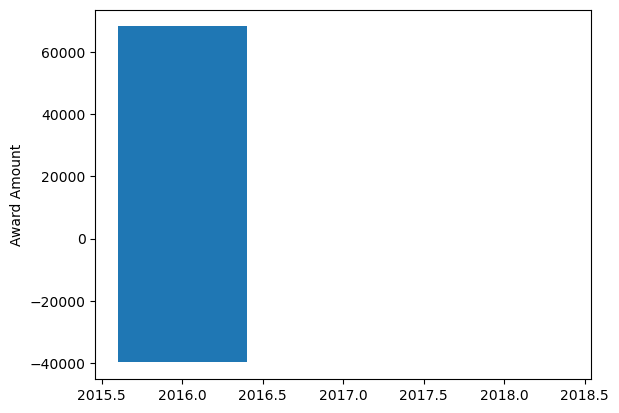

In [21]:
# Abrams tanks seem to be largely setting the pace of spending, lets move onto other GCS vehicles. 
plt.bar(M1130_df['Fiscal Year'], M1130_df['Awarded Amount'])
plt.ticklabel_format(style='plain')
plt.ylabel('Award Amount')

In [22]:
#Interesting that all M1130 spending happened in 2016, lets delve deeper into those vehicles
M1130_df.nlargest(6,'Awarded Amount')

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
2351,276929115,NaN,W15QKN09C0055,P00041,2016,TO MANUFACTURE AND DELIVER TEN (10) M1130A1 CU...,68095.00,ACC New Jersey Contracting Center (ACC-PICA),US Department of Defense (DoD),FL,Saint Petersburg,General Dynamics Ordnance and Tactical Systems...,General Dynamics Corporation,"(1315) AMMUNITION, 75MM THROUGH 125MM"
2891,277952454,NaN,W15QKN09C0055,A00006,2016,M1130 HE-PFF BB CARTRIDGE PRODUCTION,39768.69,"DCMA - St Petersburg, FL",US Department of Defense (DoD),FL,Saint Petersburg,General Dynamics Ordnance and Tactical Systems...,General Dynamics Corporation,"(1315) AMMUNITION, 75MM THROUGH 125MM"
10480,292744191,NaN,W15QKN09C0055,P00046,2016,ESTABLISH SUB-CLIN 0005AG FOR TEN (10) ADDITIO...,25700.80,ACC New Jersey Contracting Center (ACC-PICA),US Department of Defense (DoD),FL,Saint Petersburg,General Dynamics Ordnance and Tactical Systems...,General Dynamics Corporation,"(1315) AMMUNITION, 75MM THROUGH 125MM"
23817,322506637,NaN,W15QKN09C0055,P00048,2018,INCLUDE THE AGREEMENT BETWEEN GD-OTS ST. PETER...,0.00,ACC New Jersey Contracting Center (ACC-PICA),US Department of Defense (DoD),FL,Saint Petersburg,General Dynamics Ordnance and Tactical Systems...,General Dynamics Corporation,"(1315) AMMUNITION, 75MM THROUGH 125MM"
3352,278944940,NaN,W15QKN09C0055,P00043,2016,M1130 HE-PFF BB CARTRIDGE - LOT 1,-39768.69,ACC New Jersey Contracting Center (ACC-PICA),US Department of Defense (DoD),FL,Saint Petersburg,General Dynamics Ordnance and Tactical Systems...,General Dynamics Corporation,"(1315) AMMUNITION, 75MM THROUGH 125MM"


Text(0, 0.5, 'Award Amount (in hundreds of millions)')

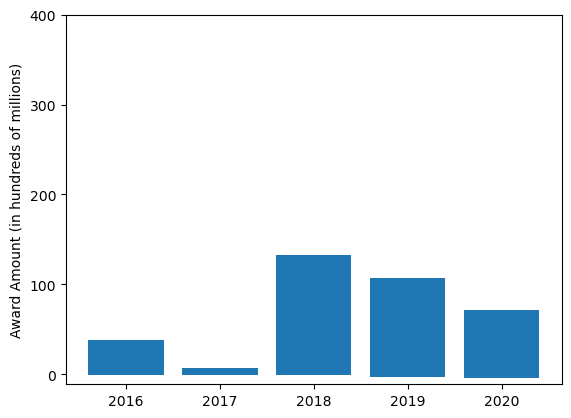

In [23]:
#Upon examining this, it is strange that one of the inputs are negative. While possible to change the input to postive I am not certain I want to do that. It would be easy to create a for loop to adjust all values to positive, or in this case directly edit the excel page to make the value positive since its a single input. however I will keep the input as is since I believe it is canceling out another value elsewhere. Furthermore the item is not listed as a something that has been produced so I am skeptical that simply turning that value into positive will change the results.
plt.bar(Bradley_df['Fiscal Year'], Bradley_df['Awarded Amount'])
plt.ticklabel_format(style='plain')
plt.yticks([0, 100000000, 200000000, 300000000, 400000000], ['0', '100', '200', '300','400'])
plt.ylabel('Award Amount (in hundreds of millions)')

In [24]:
# Bradley seems to be our other big cost, but not to the same degree as the Abrams, lets examine them in more detail.
display(Bradley_df)

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
1449,274853092,NaN,W56HZV13C0018,P00043,2016,BRADLEY SYSTEM TECHNICAL SUPPORT P00043,65338.00,US Department of the Army,US Department of Defense (DoD),CA,Santa Clara,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
1521,275023883,NaN,W56HZV13C0018,P00044,2016,BRADLEY SYSTEM TECHNICAL SUPPORT P00044,118050.00,US Department of the Army,US Department of Defense (DoD),CA,Santa Clara,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
1611,275260701,W56HZV15AA901,1,2,2016,IGF::OT::IGF MODIFICATION TO EXERCISE OPTION T...,280426.72,US Department of the Army,US Department of Defense (DoD),AL,Huntsville,"Vali, Inc.","Vali, Inc.",(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
1977,275903444,NaN,W56HZV13C0018,P00045,2016,BRADLEY SYSTEM TECHNICAL SUPPORT P00045,54555.00,US Department of the Army,US Department of Defense (DoD),CA,Santa Clara,Bae Systems Land & Armaments L.P.,BAE Systems,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
2267,276749577,NaN,SPRDL116P0072,0,2016,CABLE AND CONDUIT A FOR DSESTS AND WILL BE UTI...,6640.00,DLA Land - Warren,US Department of Defense (DoD),FL,Miami,S I T Corporation,S I T Corporation,(6150) MISCELLANEOUS ELECTRIC POWER AND DISTRI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49061,652319429,NaN,W56HZV20C0216,0,2020,THREE YEAR TEAM ARMOR PROGRAM (TAP)CONTRACT TO...,14305951.70,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,(J025) MAINT/REPAIR/REBUILD OF EQUIPMENT- VEHI...
49067,652319936,NaN,W56HZV07C0096,P00260,2020,SYSTEMS TECHNICAL SUPPORT AND SUSTAINMENT SYST...,-133025.00,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
49072,652319956,NaN,W56HZV13C0018,P00069,2020,DE-OBLIGATION OF CANCELLING FUNDS ON THE BRADL...,-3301309.90,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
49793,652869021,W31P4Q09A0021,15,80,2020,OBSOLESCENCE SUPPORT TO MISSILE DEFENSE AGENCY...,258320.21,"ACC-RSA Redstone Arsenal, AL",US Department of Defense (DoD),AL,Huntsville,"Torch Technologies, Inc.","Torch Technologies, Inc.",(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...


In [25]:
Bradley_df.nlargest(10,'Awarded Amount')

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
29526,544527714,NaN,W56HZV18C0133,0,2018,A4 UCA FOR PRODUCTION OF 164 BRADLEY M2A4 AND ...,1.322383e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
39274,583475187,NaN,W56HZV18C0133,PZ0010,2019,PURPOSE OF THIS MODIFICATION IS TO DEFINITIZE ...,1.073616e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
42855,607097823,W56HZV17D0078,W56HZV20F0014,0,2020,BRADLEY FIGHTING VEHICLE ENGINEERING CHANGE PR...,7.098789e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Plymouth,"Loc Performance Products, Inc.","Loc Performance Products, Inc.","(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
32552,553404847,NaN,W56HZV15C0119,P00058,2018,THOR II HYDRO MECHANICALLY PROPELLED TRANSMISS...,4.300890e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Muskegon,"L3 Technologies, Inc.",L3Harris Technologies,(2520) VEHICULAR POWER TRANSMISSION COMPONENTS
48503,649978510,NaN,W56HZV15C0099,P00147,2020,SYSTEMS TECHNICAL SUPPORT AND SUSTAINMENT SYST...,3.974641e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),CA,San Jose,Bae Systems Land & Armaments L.P.,BAE Systems,(R425) SUPPORT- PROFESSIONAL: ENGINEERING/TECH...
3677,279385372,NaN,W56HZV15C0119,P00012,2016,MODIFICATION P00012 IS FOR THE PROCUREMENT OF ...,3.803998e+07,US Department of the Army,US Department of Defense (DoD),MI,Muskegon,"L3 Technologies, Inc.",L3Harris Technologies,(2520) VEHICULAR POWER TRANSMISSION COMPONENTS
39984,597411197,NaN,W56HZV15C0119,P00077,2019,TRANSMISSION (HYDRO-MECHANICALLY PROPELLED TRA...,3.569136e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Muskegon,"L3 Technologies, Inc.",L3Harris Technologies,(2520) VEHICULAR POWER TRANSMISSION COMPONENTS
5229,282365221,NaN,W56HZV16C0057,0,2016,CONVERSION OF BRADLEY M3 TO M2 VEHICLES.,2.539331e+07,US Department of the Army,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
2541,277343515,NaN,W56HZV15C0099,P00003,2016,BRADLEY SYSTEM TECHNICAL SUPPORT AND SUSTAINME...,1.463602e+07,US Department of the Army,US Department of Defense (DoD),CA,Santa Clara,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
49061,652319429,NaN,W56HZV20C0216,0,2020,THREE YEAR TEAM ARMOR PROGRAM (TAP)CONTRACT TO...,1.430595e+07,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,(J025) MAINT/REPAIR/REBUILD OF EQUIPMENT- VEHI...


Text(0.5, 1.0, 'Award Amount by Year For All GCS projects')

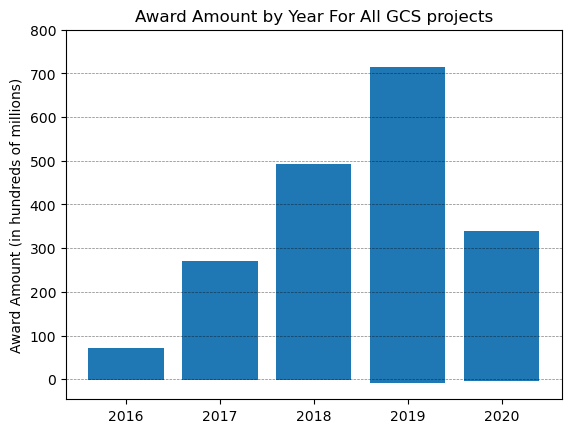

In [30]:
# With this we can see that production and modification seem to be the largest spenders, not the contracts like for the Abram tanks. But before finishing the code portion of the assessment, I want to account for the different varients present in the dataset. M1A2 is a varient of the M1A1 and is a newer model, but very much remains a GCS type project. With that being said I want to see if adding will impact our findings.
final_gcs_df = dod_df[dod_df['Title'].str.contains('M1A1|M1A2|M2A1|M1130|Bradley|BRADLEY', na=False)]
plt.bar(final_gcs_df['Fiscal Year'], final_gcs_df['Awarded Amount'])
plt.ticklabel_format(style='plain') 
plt.yticks([0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000, 800000000], ['0', '100', '200', '300','400','500','600','700','800'])
plt.ylabel('Award Amount (in hundreds of millions)')
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Award Amount by Year For All GCS projects')

In [27]:
#Adding the M1A2 completely changes the overall trend which makes sense since the M1A1 is a older varient. 
final_gcs_df.nlargest(10,'Awarded Amount')

,ID,Contract Number (IDVPIID),Award Number (PIID),Modification Number,Fiscal Year,Title,Awarded Amount,Contracting Office,Contracting Agency,Place of Performance State,Place of Performance City,vendor_name,vendor_top,PSC Name
34677,554843298,W56HZV18D0012,W56HZV19F0116,0,2019,AWARD DELIVERY ORDER W56HZV-19-F-0116 (0005) A...,7.144557e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
30954,545669179,W56HZV18D0012,3,0,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",4.920155e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
28622,544002505,W56HZV18D0012,4,0,2018,"UNDER THE PROPOSED CLASS OF CONTRACTS, THE ARM...",4.416123e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
42850,607097265,W56HZV18D0012,W56HZV19F0358,P00001,2020,PROCURE 78 M1A2 SEPV3 VEHICLES AND THEIR SUPPO...,3.401244e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
30960,545677007,W56HZV18D0012,2,0,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",2.793410e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
21032,317650727,NaN,W56HZV17C0108,0,2017,THE PURPOSE OF THIS CONTRACT IS TO INSTALL AND...,2.701645e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
30937,545656509,W56HZV18D0012,1,0,2018,"THREE-YEAR REQUIREMENTS CONTRACT, FOR THE UPGR...",2.042888e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),MI,Sterling Heights,General Dynamics Land Systems Inc.,General Dynamics Corporation,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
29526,544527714,NaN,W56HZV18C0133,0,2018,A4 UCA FOR PRODUCTION OF 164 BRADLEY M2A4 AND ...,1.322383e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
39274,583475187,NaN,W56HZV18C0133,PZ0010,2019,PURPOSE OF THIS MODIFICATION IS TO DEFINITIZE ...,1.073616e+08,0646 AQ TM CONTRACTING TEA - APO,US Department of Defense (DoD),PA,York,Bae Systems Land & Armaments L.P.,BAE Systems,"(2350) COMBAT, ASSAULT, AND TACTICAL VEHICLES,..."
2596,277405241,W56HZV13D0015,4,0,2016,IGF::OT::IGF CLS/TRAINING SERVICES FOR M1A1 TA...,7.253034e+07,US Department of the Army,US Department of Defense (DoD),NaN,NaN,General Dynamics Land Systems Inc.,General Dynamics Corporation,(Z1EE) MAINTENANCE OF TANK AUTOMOTIVE FACILITIES


In [28]:
#Now we have a lot more of a diverse set of title outputs, with some rows still being contracts, and others being production and modernization.
final_gcs_df['vendor_top'].value_counts()


BAE Systems                                                135
General Dynamics Corporation                               104
Lockheed Martin Corporation                                 52
LEONARDO SPA                                                42
Raytheon Technologies Corporation                           31
                                                          ... 
Jacobs Engineering Group Inc.                                1
API Heat Transfer Parent, LLC                                1
Optex Systems Holdings, Inc.                                 1
Rayotek Scientific, Inc.                                     1
National Center For Defense Manufacturing and Machining      1
Name: vendor_top, Length: 73, dtype: int64